# Project: Machine Learning Applications in Dating Apps

In this project, I will apply machine learning algorithms to investigate and predict the correlations of different attributes of users from a dating app named OKCupid.

The data for the project is given in profiles.csv, containing nearly 60,000 users of OKCupid.

# Scope:

There are 3 sections to this project:

1. Preparation for Machine Learning Analysis
2. Machine Learning Implementation
3. Conclusions

Each of these chapters have their own smaller parts, where different problems from the data are solved.  This involves visualization, data wrangling and cleaning, and of course our machine learning models.

# Project Goals:

These are the following questions to be answered in this project:

- How can be successfully implement and optimize machine learning models to answer questions such as the predictions of gender, status, and income?
- How can we manage such a large dataset with numerous missing values and erratically formatted data?
- What are the most important factors affecting other categorical variables in this dataset?
- Which implementation of machine learning models is the most accurate across all problems?
- Can we determine and use only the most important categorical variables that affect a certain variable in order to optimize efficiency and accuracy?

# Import All Libraries:

Numerous data exploration and machine learning libraries will be required:

In [16]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Section I: Preparation for Machine Learning Analysis

# 1.1: Data Exploration and Summary Statistics

First, we will understand the metrics and categories of the given .csv file:

In [17]:
# Import the .csv file:
all_data = pd.read_csv('profiles.csv')
all_data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [18]:
print('The entire file contains ' + str(len(all_data)) + ' entries.')
all_data.describe()

The entire file contains 59946 entries.


,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


There are about 60,000 entries in this file.  Although only 3 people did not input their height into the system, it is almost negligible considering the size of our dataframe.  At this point we will investigate the different categories:

In [19]:
all_data.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [20]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

There appears to be numerous missing values for several categories in this dataframe.  Certain columns with missing values will be dropped depending on the question with its corresponding machine learning algorithm.

We will now visualize the distribution of ages and genders from this dataframe:

<Figure size 900x800 with 0 Axes>

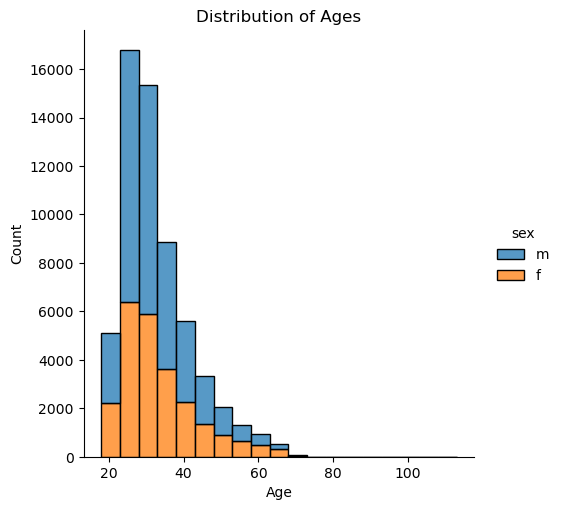

In [21]:
plt.figure(figsize = (9, 8))
sns.displot(data=all_data, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()

All 59,949 users of this dating app are 80 years or younger. The mode of the distribution falls between 20 and 30 years of age. However, the above distribution is right-skewed because of this mode.

Now we will visualize the distribution of body types:

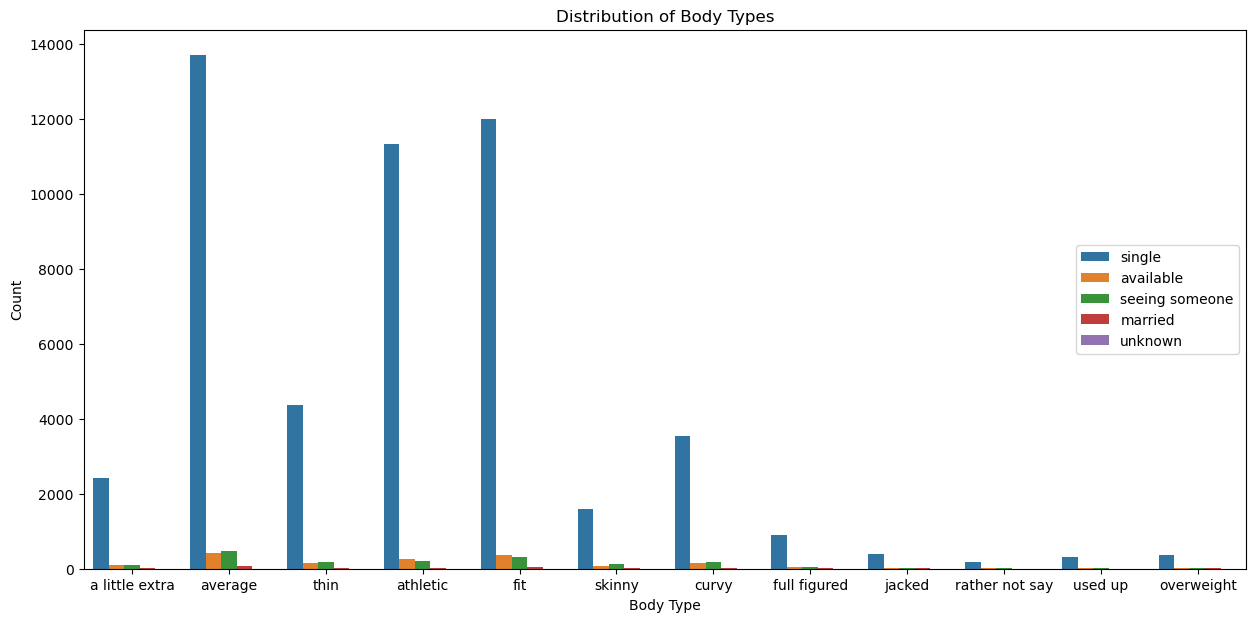

In [22]:
plt.figure(figsize= (15,7))
sns.countplot(data = all_data, x = 'body_type', hue = 'status')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.title('Distribution of Body Types')
plt.legend(loc = 7)
plt.show()

Most of the dating app users have either an average, athletic, or fit body type.  Very few OKCupied users are overweight or used up.  Obviously, the most conspicuous aspect of the above plot is that over 50,000 of the users in total are single, which makes sense considering that we are considering dating app users.

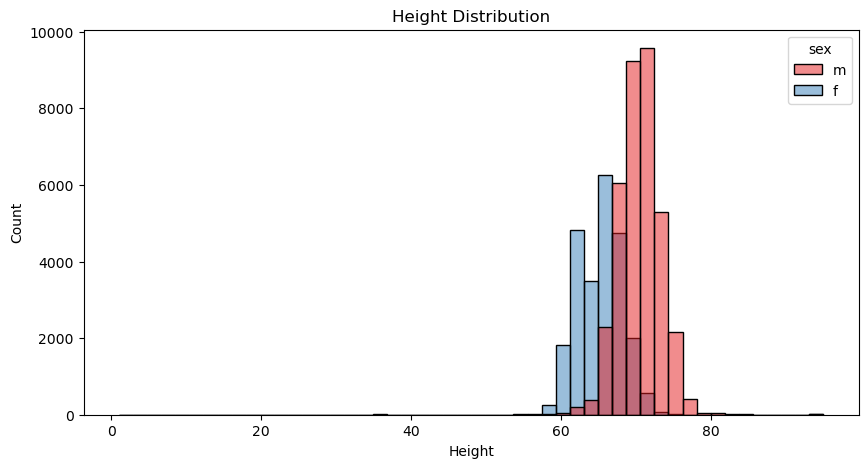

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(data = all_data, x='height', bins = 50, hue='sex', palette='Set1')
plt.xlabel('Height')
plt.title('Height Distribution')
plt.show()

Now we will visualize gender and education:

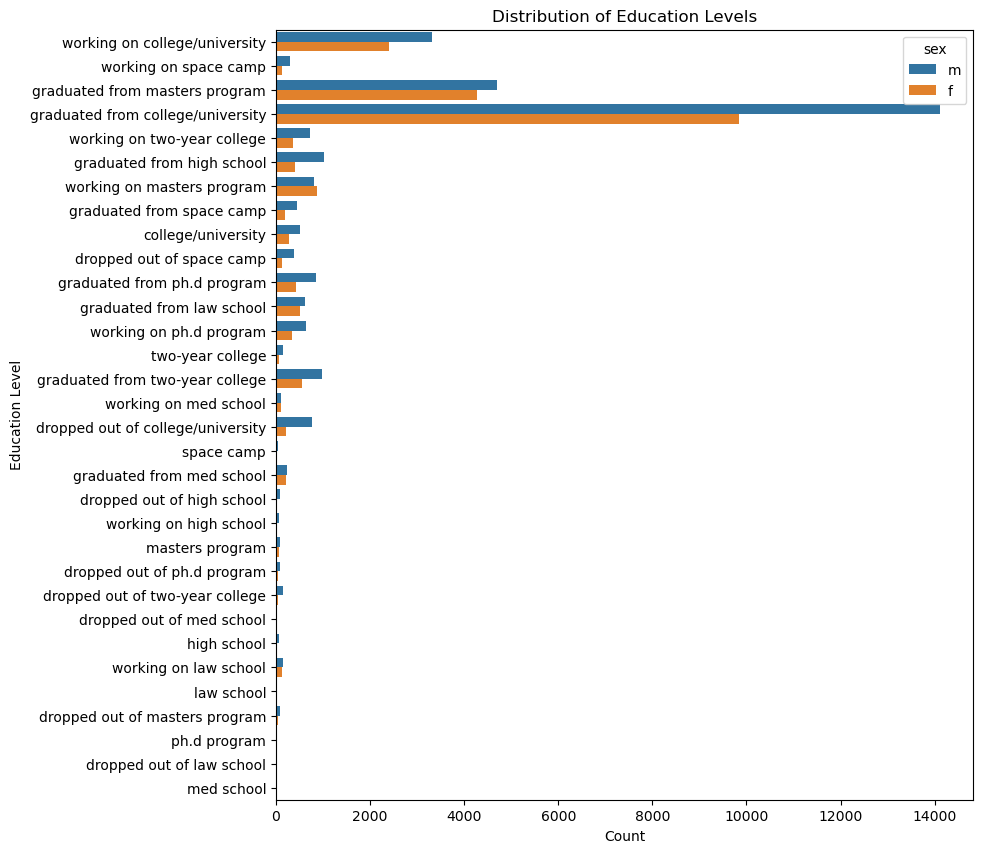

In [24]:
plt.figure(figsize = (9, 10))
sns.countplot(data = all_data, y = 'education', hue = 'sex')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.title('Distribution of Education Levels')
plt.show()

A majority of the users are in college or have graduated from college or their masters program.  This correlates to the mode of the age distribution between 20 and 30.

# 1.2: Cleaning

We will first clean the education variable in the dataframe:

In [25]:
all_data['education_cleaned'] = all_data.education.str.split().str[-2:].str.join(' ')
all_data.education_cleaned.fillna('Unknown', inplace=True)
all_data.education_cleaned.value_counts()

from college/university    23959
masters program            10920
Unknown                     6628
on college/university       5712
two-year college            3018
ph.d program                2408
high school                 1713
space camp                  1683
law school                  1428
of college/university        995
college/university           801
med school                   681
Name: education_cleaned, dtype: int64

Next we will clean the religion variable in the dataframe:

In [26]:
all_data['religion_cleaned'] = all_data.religion.str.split().str[0]
all_data['religion_cleaned'].fillna('Unknown', inplace=True)
all_data.religion_cleaned.value_counts()

Unknown         20226
agnosticism      8812
other            7743
atheism          6985
christianity     5787
catholicism      4758
judaism          3098
buddhism         1948
hinduism          450
islam             139
Name: religion_cleaned, dtype: int64

Now that the religion and education variables are cleaned, we can visualize the relationship between education and religion:

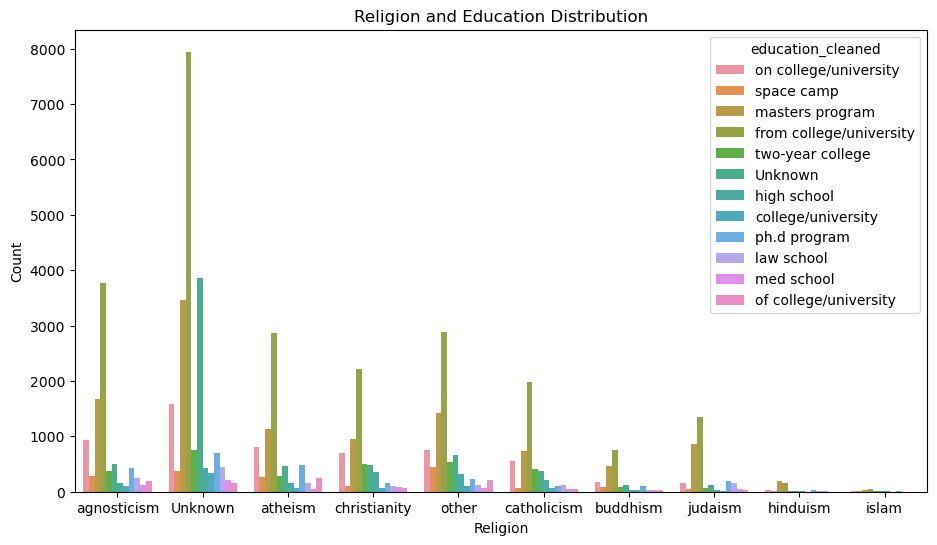

In [28]:
plt.figure(figsize = (11, 6))
sns.countplot(data = all_data, x = 'religion_cleaned', hue = 'education_cleaned')
plt.title('Religion and Education Distribution')
plt.xlabel('Religion')
plt.ylabel('Count')
plt.show()

Most of the users have chosen not to input their religion.  As mentioned in a previous visualization, most of the users are in college or have just graduated for every religion category.  Most of the users are agnostic, christian, or atheist.

Now we will clean the job variable:

In [29]:
all_data['job_cleaned'] = all_data['job'].str.split('/').str[-1]
all_data.job_cleaned.fillna('Unknown')
all_data.job_cleaned.value_counts()

other              7589
student            4882
 engineering       4848
 software          4709
 writer            4439
 biz dev           4391
 health            3680
 academia          3513
 management        2373
 real estate       2266
 media             2250
 legal services    1381
 travel            1364
 craftsmanship     1021
 administrative     805
 government         708
rather not say      436
transportation      366
unemployed          273
retired             250
military            204
Name: job_cleaned, dtype: int64

Now we will clean the sign variable:

In [30]:
all_data['sign_cleaned'] = all_data.sign.str.split().str[0]
all_data.sign_cleaned.fillna('Unknown')
all_data.sign_cleaned.value_counts()


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: sign_cleaned, dtype: int64

# 1.3: Creating a New DataFrame

Now that all of the variables have been cleaned, we will create a new dataframe called "profiles", which will not have 31 categories in which many are unnecessary.

Given that many of the inputs are not numerical, we will need to convert them into a numerical form.  This way, we will be able to implement machine learning algorithms to the data.

In [31]:
# New DataFrame:
pd.options.mode.chained_assignment = None
categories = ['sex', 'job_cleaned',  'height', 'income', 'orientation', 'religion_cleaned', 'status', 'education_cleaned', 'body_type', 'smokes', 'age', 'sign_cleaned']

profiles = all_data[categories]
profiles['education'] = all_data.education_cleaned.map({'from college/university': 0, 'masters program': 1, 'on college/university': 0,
                                                             'two-year college' : 2, 'ph.d program': 3, 'high school': 4, 'space camp': 5,
                                            
                                                    'law school': 6, 'of college_university': 7, 'college/university': 8, 'med school': 9})
profiles.height = all_data.height.apply(lambda x: profiles.height.mean() if x <= 10 else x)     
profiles.orientation = all_data.orientation.map({'straight':0, 'gay':1, 'bisexual':2})
profiles.sex = all_data.sex.map({'m':0, 'f':1})
profiles['religion'] = all_data.religion_cleaned.map({'No Answer': 0, 'agnosticism':1, 'other':2, 'atheism':3,
                                                     'christianity':4, 'catholicism':5, 'judaism':6, 'buddhism':7,
                                                      'hinduism': 8, 'islam':9})
profiles.status = all_data.status.map({'single':0, 'seeing someone':1, 'available':2, 'married':310, 'unknown':10})
profiles.smokes = all_data.smokes.map({'no':0, 'sometimes':1, 'when drinking':2, 'yes':3, 'trying to quit': 4})

profiles.body_type = all_data.body_type.map({'average': 0, 'fit':1, 'athletic':2, 'thin':3, 
                                        'curvy': 4, 'a little extra':5, 'skinny':3, 'full figured': 6,
                                        'overweight': 5, 'jacked': 6, 'used up': 7, 'rather not say': 8})

profiles.age = all_data.age
profiles['sign'] = all_data.sign_cleaned.map({'leo': 0, 'gemini':1, 'libra':2, 'cancer':3, 
                                            'virgo': 4, 'taurus':5, 'scorpio':6, 'aries':7,
                                             'pisces':8, 'sagittarius':9, 'aquarius':10, 'capricorn':11})
profiles['job'] = all_data.job_cleaned.map({'other': 0, 'student': 1, 'engineering': 2, 'software':2, 'writer':3,
                                           'biz dev': 4, 'health': 5, 'academia':6, 'management':7, 'real estate':8,
                                            'media':9, 'legal services': 10, 'travel': 11, 'craftsmanship':12,
                                           'administrative':13, 'government':14, 'rather not say': 15, 'transportation': 16,
                                           'unemployed':17, 'retired':18, 'military':19})


# Create cleaner dataframe:
inputs = ['sex', 'job', 'height', 'orientation', 'religion', 'status', 'education', 'body_type', 'smokes', 'age', 'sign', 'income']

ml_profiles = profiles[inputs]
ml_profiles.religion.dropna(inplace=True)
ml_profiles.dropna(inplace=True)

encoder = LabelEncoder()
encoder.fit_transform(ml_profiles['religion'])
encoder.fit_transform(ml_profiles['body_type'])
encoder.fit_transform(ml_profiles['income'])
encoder.fit_transform(ml_profiles['sex'])
encoder.fit_transform(ml_profiles['education'])


ml_profiles.head(15)             

,sex,job,height,orientation,religion,status,education,body_type,smokes,age,sign,income
0,0,16.0,75.0,0,1.0,0,0.0,5.0,1.0,22,1.0,-1
9,0,1.0,65.0,0,3.0,0,2.0,2.0,0.0,37,3.0,-1
14,1,0.0,62.0,0,5.0,0,0.0,3.0,0.0,29,5.0,50000
21,1,1.0,67.0,0,5.0,0,0.0,2.0,0.0,22,5.0,-1
29,0,0.0,68.0,0,1.0,0,0.0,1.0,0.0,32,0.0,-1
30,1,0.0,64.0,0,1.0,0,0.0,0.0,4.0,27,1.0,-1
44,1,0.0,66.0,2,2.0,0,1.0,4.0,0.0,29,10.0,-1
56,0,1.0,71.0,0,3.0,0,0.0,1.0,0.0,26,9.0,-1
58,0,1.0,70.0,0,1.0,0,0.0,1.0,1.0,22,8.0,-1
62,0,15.0,70.0,0,1.0,0,1.0,3.0,2.0,31,3.0,-1


# Section II:  Machine Learning Implementation

# 2.1 Predicting Income

Now that all of the data has been cleaned, we will now find the best machine learning model implementation that will deliver the highest accuracy and efficiency in predicting the income of a user.

In [38]:
# Create variables and split:
inputs = ['status','sex', 'education', 'age', 'income', 'job']

income_profiles = ml_profiles[inputs]
income_profiles.dropna(inplace=True)
      
x = income_profiles[['status','sex', 'education', 'age', 'job']]
y = income_profiles['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)



income_profiles.head(15)

,status,sex,education,age,income,job
0,0,0,0.0,22,-1,16.0
9,0,0,2.0,37,-1,1.0
14,0,1,0.0,29,50000,0.0
21,0,1,0.0,22,-1,1.0
29,0,0,0.0,32,-1,0.0
30,0,1,0.0,27,-1,0.0
44,0,1,1.0,29,-1,0.0
56,0,0,0.0,26,-1,1.0
58,0,0,0.0,22,-1,1.0
62,0,0,1.0,31,-1,15.0


First the data must be scaled appropriately.

The first implementation of ML will be linear regression to predict income:

In [33]:
# Linear Regression model:

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)

model = LinearRegression()
model.fit(x_train_std, y_train)
y_pred = model.predict(x_test_std)

Now we will run metrics on this model to view its accuracy:

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print(model.coef_)
print('Linear Regression Test Score: ' + str(model.score(x_test_std, y_test)))
print('Linear Regression Training Score: ' + str(model.score(x_train_std, y_train)))

[ 2308.73844212 -7603.9894488   4279.90839092 -2864.59684456
  7888.85965539]
Linear Regression Test Score: 0.010070777742729464
Linear Regression Training Score: 0.013564118082658116


The regression model was able to predict the income of a user very inaccurately, as stated by a model score of 0.01. 

# Attempt 2:

This time, we will use a simple linear regressor with more PCA analysis:

In [39]:
inputs = ['sex', 'job','height', 'orientation', 'religion', 'status', 'education', 'body_type', 'smokes', 'age', 'sign', 'income']

income_profiles = ml_profiles[inputs]
income_profiles.dropna(inplace=True)
      
X = income_profiles[['sex','job', 'height', 'orientation', 'religion', 'status', 'education', 'body_type', 'smokes', 'age', 'sign']]
Y = income_profiles['income']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


model2 = LinearRegression()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print(model2.coef_)
print('Linear Regression Test Score: ' + str(model2.score(x_test, y_test)))
print('Linear Regression Training Score: ' + str(model2.score(x_train, y_train)))


[-1.03804899e+04  1.40733985e+03  1.24871884e+03 -3.19854253e+00
 -3.82936862e+02  1.20046619e+02  2.10076129e+03  3.03791477e+03
  1.66988616e+03 -2.28285418e+02 -1.04209049e+02]
Linear Regression Test Score: 0.015781915483102593
Linear Regression Training Score: 0.017960839776151816


Although a slight improvement, this is not an accurate predictor of income.

# Attempt 3:

This time we will use a random forest regressor to predict income:


In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred2 = rfr.predict(x_test)

print(rfr.score(x_train, y_train))
print(rfr.score(x_test, y_test))

0.8426490057992042
-0.04960732283378855


This time, a random forest regressor managed to perform much better on the training data, but performed worse on the test data, meaning that the model is overfitting the data.  However, this is the best result we have achieved thus far in the analysis.

Now we will implement PCA:

First, we need to view a heatmap of each of the variables:

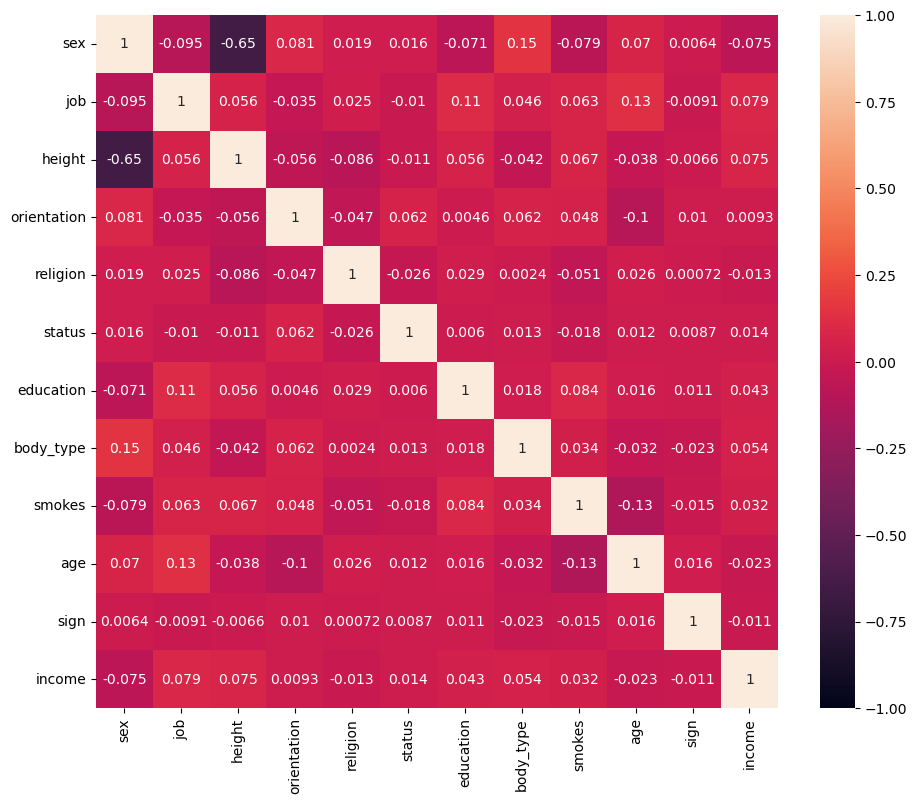

In [417]:
corr = ml_profiles.corr()
plt.figure(figsize = (11, 9))
sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
plt.show()

According to the heat map, there are really no significant correlations between any of these variables, besides sex and height, which is not the focus of this problem.

We will now hope the PCA implementation should save this machine learning problem:

In [418]:
# Define eigenvalues:

eigenvalues, eigenvectors = np.linalg.eig(corr)
print(eigenvalues)


[1.76131775 0.33885263 1.25814477 1.20758757 0.75872007 0.87258744
 0.88610228 0.90562972 1.05006535 0.97537144 0.96931062 1.01631035]


In [419]:
# Proportions:
prop_info = eigenvalues / eigenvalues.sum()
prop_info = np.sort(prop_info)[::-1]
prop_info

array([0.14677648, 0.1048454 , 0.1006323 , 0.08750545, 0.08469253,
       0.08128095, 0.08077588, 0.07546914, 0.07384186, 0.07271562,
       0.06322667, 0.02823772])

In [40]:
# Import PCA:
from sklearn.decomposition import PCA

pca_data = ml_profiles[['sex', 'job','height', 'orientation', 'religion', 'status', 'education', 'body_type', 'smokes', 'age', 'sign', 'income']]

mean = pca_data.mean(axis=0)
sttd = pca_data.std(axis=0)
data_standardized = (pca_data - mean) / sttd

pca = PCA()
components = pca.fit(data_standardized).components_
components = pd.DataFrame(components).transpose()
components.index = pca_data.columns
print(components)




                   0         1         2         3         4         5   \
sex         -0.661516  0.051275  0.130691 -0.026522 -0.001955 -0.112176   
job          0.162577 -0.205715  0.592293  0.052287  0.011317 -0.209194   
height       0.643964 -0.002518 -0.121357  0.090664  0.079113  0.053000   
orientation -0.109630  0.498899  0.039152  0.253030 -0.129742  0.076540   
religion    -0.087797 -0.262731  0.143224 -0.369683 -0.196015  0.765235   
status      -0.035465  0.122536  0.035443  0.713105  0.007894  0.288294   
education    0.149805  0.024032  0.462094 -0.068549 -0.414043  0.005678   
body_type   -0.137800  0.280101  0.397630 -0.013040  0.289012  0.081202   
smokes       0.169795  0.432627  0.219510 -0.293693 -0.223460 -0.288125   
age         -0.078789 -0.579382  0.234793  0.289503  0.074035 -0.259984   
sign        -0.016183 -0.058325 -0.049364  0.289312 -0.726287  0.020777   
income       0.153493  0.129682  0.341597  0.143163  0.316897  0.329582   

                   6    

In [41]:
# Variance
var_ratio = pca.explained_variance_ratio_
var_ratio = pd.DataFrame(var_ratio).transpose()
print(var_ratio)

# Include components
pca = PCA(n_components = 11)
 
# transform the data
data_pcomp = pca.fit_transform(data_standardized)
 
# transform into a dataframe
data_pcomp = pd.DataFrame(data_pcomp)
 
# rename columns
data_pcomp.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']
 
# print the transformed data
print(data_pcomp.head())

         0         1         2         3         4         5         6   \
0  0.146776  0.104845  0.100632  0.087505  0.084693  0.081281  0.080776   

         7         8         9         10        11  
0  0.075469  0.073842  0.072716  0.063227  0.028238  
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.136913  0.641967  1.243422 -0.122616  1.902930 -1.208291 -0.017125   
1  0.071761 -0.738893 -0.033941 -0.092579  0.461817 -0.127559  0.533123   
2 -1.972781 -0.288662  0.026769 -0.553666  0.428850  0.874125 -0.392185   
3 -1.083555 -0.144474 -0.528052 -0.682088  0.188483  0.888788 -0.112864   
4  0.583798 -0.258394 -1.157128  0.054489  1.609788 -0.822732  0.658257   

        PC8       PC9      PC10      PC11  
0 -1.607176  0.296703 -0.882988 -1.621551  
1  0.053056 -0.060172  0.632850  0.137764  
2  0.110884  0.459299 -0.145709 -0.085032  
3 -0.086036  0.353406 -0.269484 -0.578900  
4  0.359684 -0.117119  0.295862 -0.146655  


# Attempt 4:

Now we will attempt regression again using the PCA sorted values:

In [42]:
components = data_pcomp[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']]
labels = pca_data['income']

# Test split:

x_train, x_test, y_train, y_test = train_test_split(components, labels, test_size = 0.2, random_state = 42)

pca_reg = LinearRegression()
pca_reg.fit(x_train, y_train)

print(pca_reg.score(x_test, y_test))
print(pca_reg.score(x_train, y_train))

0.9889439870999797
0.9861851022745716


Now, we have drastically improved the model by performing PCA on the given data.  Taking the first 8 PCA components already puts us at a 0.98 accuracy, meaning we can exclude 3 other features.

Even choosing the first 6 or 7 PCA components already places us at around a 0.7 accuracy.  

# 2.2 Predicting Status:

Now we have ourselves a classification problem.  The vast majority of users are single as expected, so reformatting the data is necessary.

We will have the find the most accurate machine learning implementation for this problem:

In [43]:
# Decision Tree:

x = ml_profiles.drop(columns = 'status')
y = ml_profiles.status

# Split data:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

decision_tree = DecisionTreeClassifier(max_depth = 5, criterion = 'gini')
decision_tree.fit(x_train, y_train)
y_pred= decision_tree.predict(x_test)

# Metrics:

print('Accuracy score: ' + str(accuracy_score(y_pred, y_test)))
print('F1 score: ' + str(f1_score(y_pred, y_test, average='micro')))
print('Precision score: ' + str(precision_score(y_pred, y_test, average='micro')))
print('Recall score: ' + str(recall_score(y_pred, y_test, average='micro')))



Accuracy score: 0.9105960264900662
F1 score: 0.9105960264900662
Precision score: 0.9105960264900662
Recall score: 0.9105960264900662


The decision tree classifier method worked successfully with over 90% scores across all 4 metrics.  With a decision tree it is crucial to plot this decision tree for visualization:

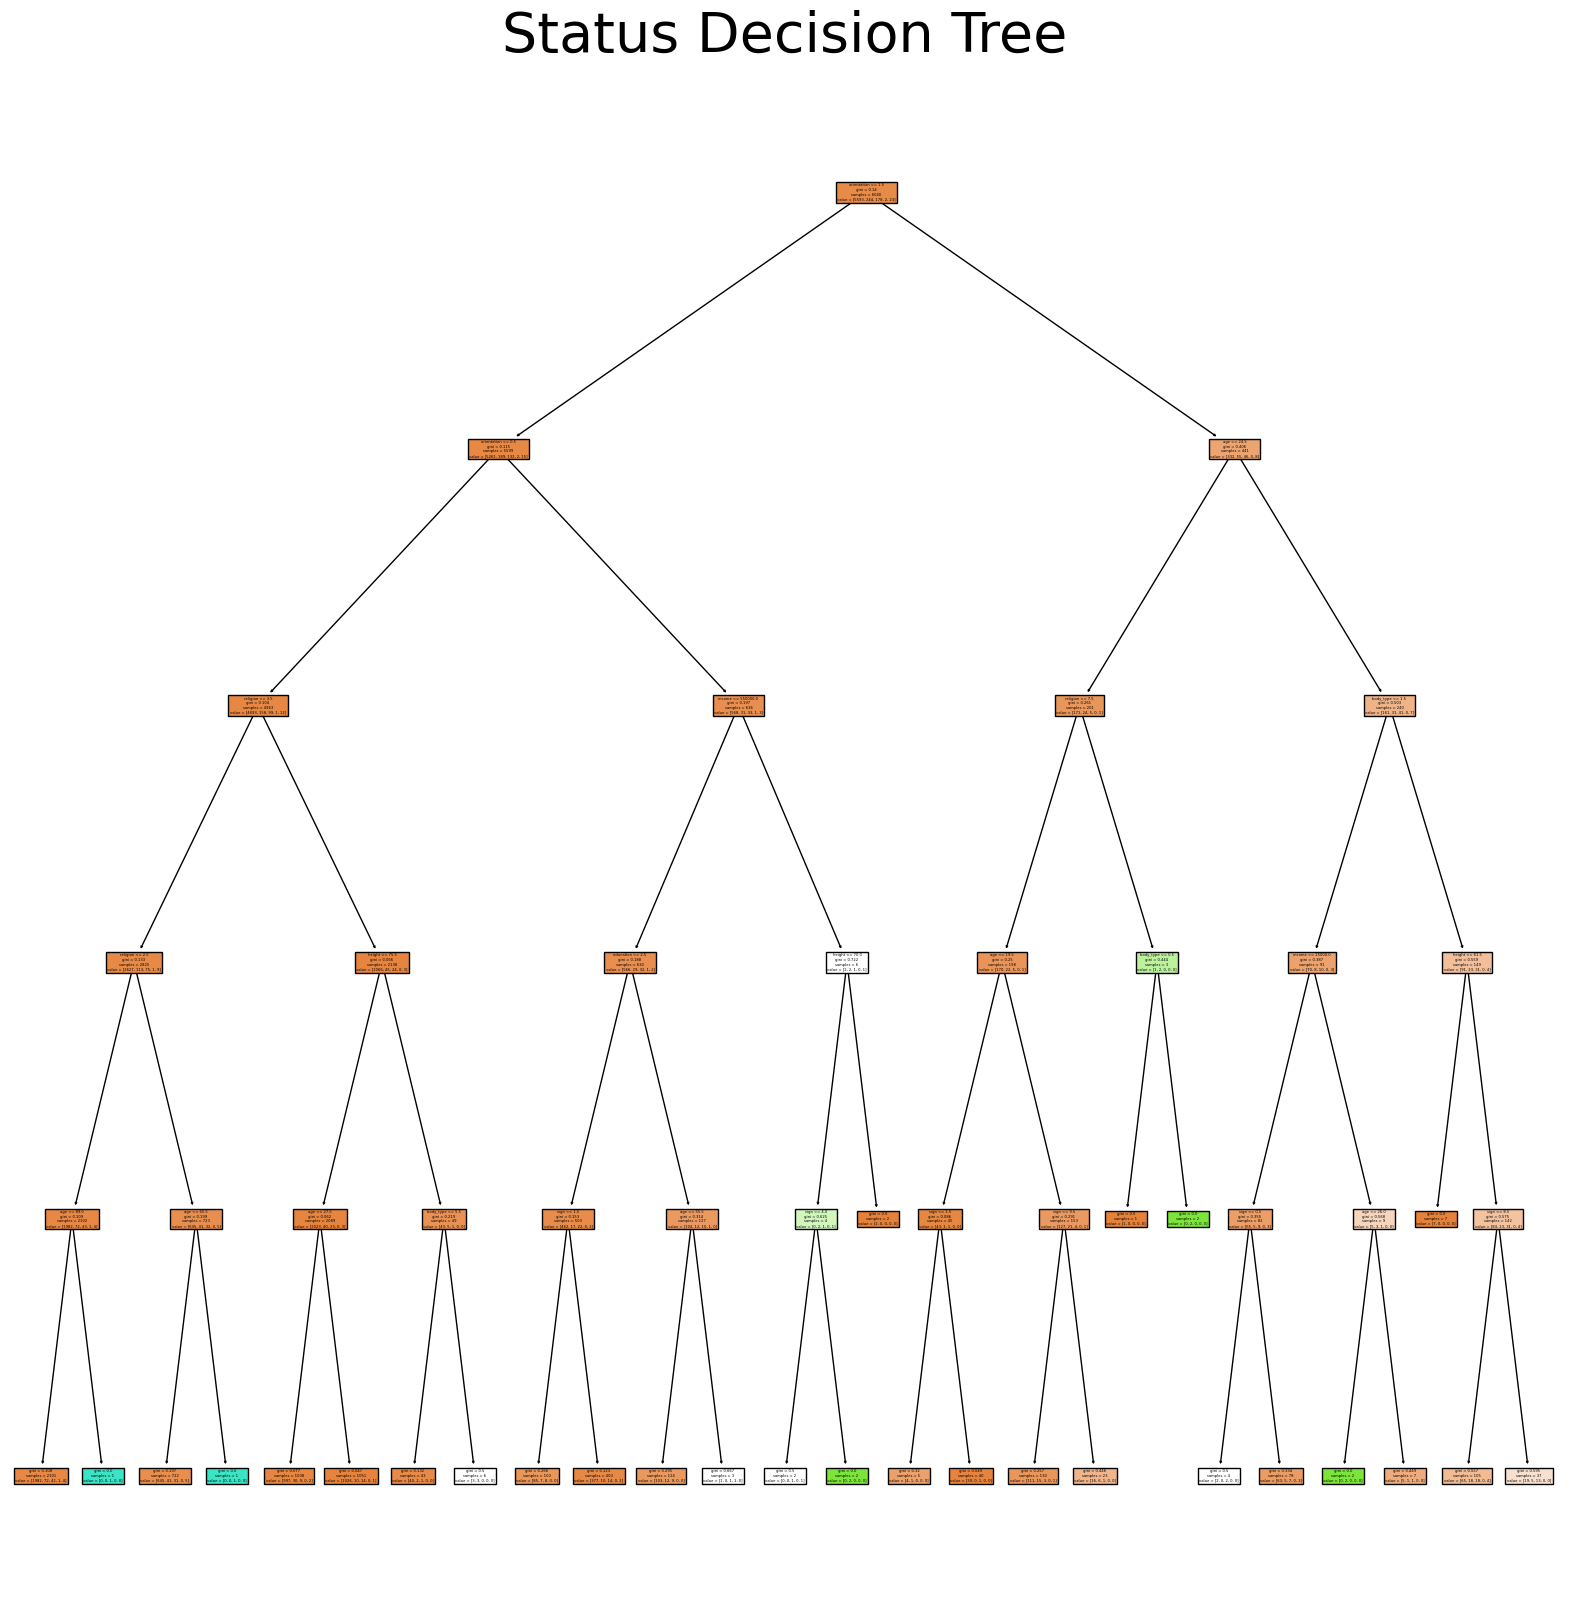

In [481]:
# Plot tree:
from sklearn import tree

plt.figure(figsize = (20,20))
tree.plot_tree(decision_tree, feature_names = x_train.columns, filled = True)
plt.title('Status Decision Tree', fontsize= 40)
plt.show()

Given that our decision tree is performing well, it is now necessary to improve the accuracy of the model through random forests and optimization of tree depth.

In [464]:
feature_importance = decision_tree.feature_importances_
feature_importance

array([0.        , 0.        , 0.06543425, 0.35600451, 0.09482653,
       0.02369789, 0.08794641, 0.        , 0.22113153, 0.09301212,
       0.05794676])

Text(0, 0.5, 'Category')

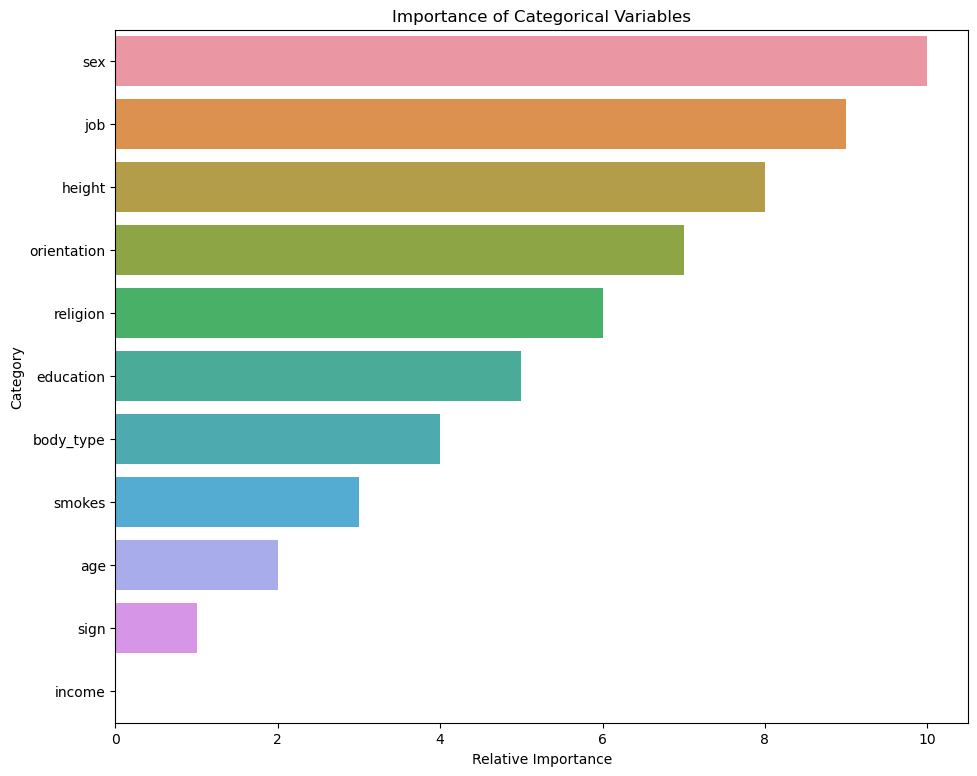

In [475]:
# Plot the data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_names = x.columns.values[sorted_indices]
sorted_importances = feature_importance[sorted_indices]

plt.figure(figsize=(11, 9))
sns.barplot(sorted_importances, sorted_feature_names)
plt.title('Importance of Categorical Variables')
plt.xlabel('Relative Importance')
plt.ylabel('Category')

According to the bar chart, a user's gender, job, and height are the most importance variables in determining their status.  Age and sign do not play a significant role.

As expected, a user's sign is only dependent on their date of birth, which obviously should have little to no correlation between their status.

Now, we will maximize the depth of the decision tree to maximize efficiency and accuracy:

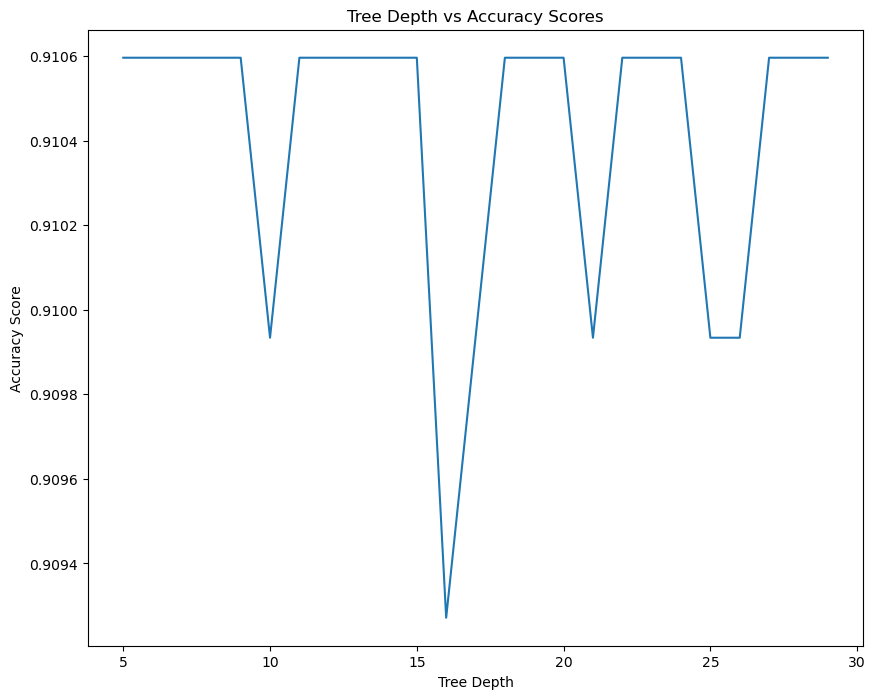

In [482]:
scores = []
depths = []
for depth in range(5, 30):   
    depths.append(depth)
    rfc = RandomForestClassifier(max_depth = depth, criterion = 'gini', random_state = 42)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.figure(figsize = (10, 8))
plt.plot(depths, scores)
plt.title('Tree Depth vs Accuracy Scores')
plt.ylabel('Accuracy Score')
plt.xlabel('Tree Depth')
plt.show()


It seems that there is a massive trough in the line plot at depth = 16.  At depth = 22, there is a very steep decrease in the accuracy of the score.  That being said, the score for all 30 depths is maintained above 0.90.

The plot seems to be very erratic.

From this graph, we can infer that the number of estimators to optimize accuracy will probably also be erratic and insensitive.

In [493]:
# Optimization
forest = RandomForestClassifier(max_depth = 29, criterion = 'gini', random_state = 42)
forest.fit(x_train, y_train)
y_pred2 = forest.predict(x_test)

print('Accuracy score: ' + str(accuracy_score(y_pred2, y_test)))
print('F1 score: ' + str(f1_score(y_pred2, y_test, average = 'micro')))
print('Precision score: ' + str(precision_score(y_pred2, y_test, average='micro')))
print('Recall score: ' + str(recall_score(y_pred2, y_test, average='micro')))

Accuracy score: 0.9105960264900662
F1 score: 0.9105960264900662
Precision score: 0.9105960264900662
Recall score: 0.9105960264900662


Due to the fact that the above graph leveled off numerous times, there are numerous depths that maximize the efficiency of the machine learning model.

# 2.3 Predicting Gender

The forest classification method was a long a tedious process, in which reformatting the data and maximizing the tree depths and estimators were necessary for an optimized accuracy.

In this section we wish to know if a simpler method, a support vector machine, is capable of performing as well or better than the decision trees, but to predict gender.

In [51]:
# Prepare the model:

from sklearn.svm import SVC

input_final = ['job','height', 'orientation', 'religion', 'status', 'education', 'body_type', 'smokes', 'age', 'sign', 'income']

x = ml_profiles[input_final]
y = ml_profiles['sex']
     
     
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

classifier = SVC(kernel = 'poly')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print('Accuracy score: ' + str(accuracy_score(y_pred, y_test)))
print('F1 score: ' + str(f1_score(y_pred, y_test, average='micro')))
print('Precision score: ' + str(precision_score(y_pred, y_test, average='micro')))
print('Recall score: ' + str(recall_score(y_pred, y_test, average='micro')))



Accuracy score: 0.5403973509933775
F1 score: 0.5403973509933775
Precision score: 0.5403973509933775
Recall score: 0.5403973509933775


The scores of this model are 0.54, which is not bad, but not great.  We can also improve upon this model by optimizing the values for C and gamma.

We will now visualize the confusion matrix for this model thus far:

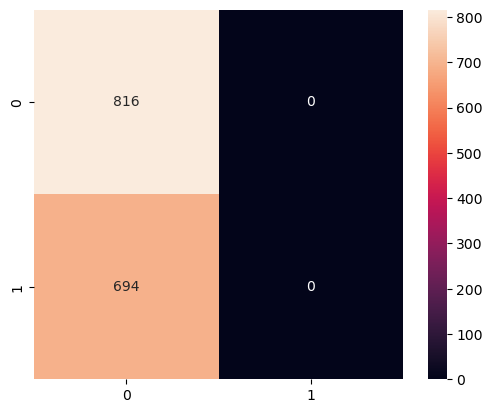

In [77]:
# Correlation matrix:

y_pred = classifier.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)

# Heatmap

sns.heatmap(matrix, xticklabels = True, yticklabels = True, annot = True, square = True, fmt = 'd')
plt.show()

Notice how our heatmap shows that we have 0 correctly identified females.  This is not a clean model, so we will need to optimize it by finding the correct parameters.

In [54]:
# Gamma and C optimization:

scores = {}
gammac = []
for gamma in np.logspace(-3,2,6).tolist():
    for c in np.logspace(-3,2,6).tolist():
        gammac.append((gamma,c))
        svm = SVC(gamma = gamma, C = c)
        svm.fit(x_train, y_train)
        score = svm.score(x_test, y_test)
        scores[(gamma,c)] = score

gammas = [x[0] for x in scores.keys()]
cs = [x[1] for x in scores.keys()]
scores = list(scores.values())

# Pairing the best values:

best_score = max(scores)
best_index = scores.index(best_score)
best_gamma = gammas[best_index]
best_C = cs[best_index]

print(f'Best Accuracy Score: {best_score}' )
print(f'Best Gamma: {best_gamma}' )
print(f'Best C: {best_C}' )

Best Accuracy Score: 0.8364238410596027
Best Gamma: 0.001
Best C: 10.0


In [78]:
# Optimize the Support Vector Machine:

svc_opt = SVC(gamma = best_gamma, C = best_C)
svc_opt.fit(x_train, y_train)
y_pred = svc_opt.predict(x_test)

print('Accuracy score: ' + str(accuracy_score(y_pred, y_test)))
print('F1 score: ' + str(f1_score(y_pred, y_test, average='micro')))
print('Precision score: ' + str(precision_score(y_pred, y_test, average='micro')))
print('Recall score: ' + str(recall_score(y_pred, y_test, average='micro')))

Accuracy score: 0.8364238410596027
F1 score: 0.8364238410596025
Precision score: 0.8364238410596027
Recall score: 0.8364238410596027


Now we will again visualize a heatmap:

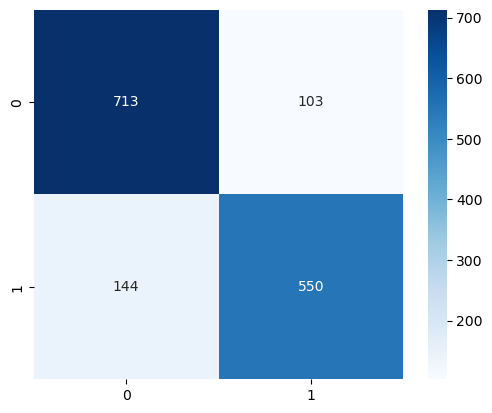

In [80]:
matrix = confusion_matrix(y_test, y_pred)

# Heatmap

sns.heatmap(matrix, xticklabels = True, yticklabels = True, annot = True, square = True, cmap = 'Blues', fmt = 'd')
plt.show()

Much better!  We have drastically increased our metrics to be 0.836, far better than the 0.54 that we had produced before our optimization of the C and gamma values.

Now, we should also find out if there are more accurate machine learning models that could perform more accurately.

# Attempt 2: Random Forest

We will only test the Random Forest model because for other sections it seemed to have performed the more accurately under all circumstances.

In [69]:
# Implement parameters:

params = {'n_estimators': [5, 100], 'criterion': ['gini'], 'max_depth': [5,10,15,20]}

# Implement classifier:
rf = RandomForestClassifier()
clf_rf = GridSearchCV(estimator = rf, scoring='f1', param_grid = params)
clf_rf.fit(x_train, y_train)

print('Best parameters: ' + str(clf_rf.best_params_))
print('Best score: ' + str(clf_rf.best_score_))


Best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
Best score: 0.8385804557091829


The Random Forest model defeats the Support Vector Machine by a very small margin.  

Again we will visualize the heat map:

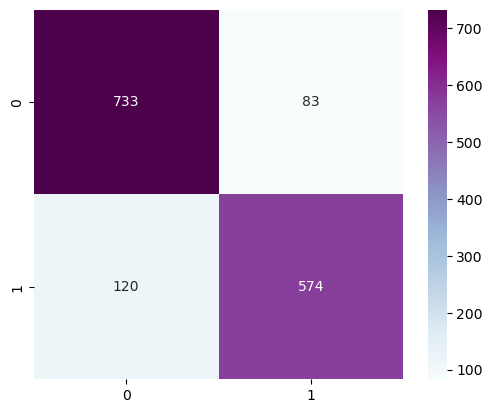

In [82]:
y_pred4 = clf_rf.predict(x_test)

matrix = confusion_matrix(y_test, y_pred4)

# Heatmap

sns.heatmap(matrix, xticklabels = True, yticklabels = True, annot = True, square = True, fmt = 'd', cmap = 'BuPu')
plt.show()

The random forest model wins this problem, beating out the Support Vector Machine by only 0.02 in their accuracy scores.

Now we can understand how to implement these algorithms for data analysis.

# Section III: Conclusions

Section I:

- There were 31 columns in our dataframe, many of which were unncessary for the problems that were being solved in this project.  This called for a necessary cleaning of the dataset.
- As expected, most of these dating app users were between 20 and 30 years of age.
- Most of the users were in college or in a masters program.
- Users input their religion, education, and job in a very inconsistent manner.  However, we could clean this data by taking a certain section of these descriptions.
- A new dataframe was necessary to contain all of the cleaned data.  This would facilitate the accuracy of the machine learning models used in Section II.

Section II:
- Across the board, the Random Forest Regressor and Classifier models were the most successful in their accuracies.
- Income prediction with a simple linear regressor was very inaaccurate, hence it called for a Principal Component Analysis (PCA) to greatly change its accuracy.
- A decision tree was required to determine the status of a user.
- Implementing multiple decision tree in a random forest further improved upon a singular decision tree.
- A user's gender, job, and height were the most significant variables in determining a user's status.
- Predicting the gender of a user through the use of a Support Vector Machine (SVM) was improved through the optimization of the C and gamma values.
- The Random Forest Classifier still prevailed in its accuracy of determining a user's gender.
